In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

In [2]:
plt.rc('font', family='serif', size=12)
plt.rc('mathtext', fontset='cm', rm='serif')

# Analytical parabola and spherical indenters

<div>
    <br>
    <img src="imgs/hertz-model.png" width="50%"/>
    <br>
</div>

**parabola indenter** [1], *2.5.3 The Paraboloid*, p.16, Eq. 2.29

$$
F_N(a) = \frac{4}{3}\frac{E}{1-\nu^2}\frac{a^3}{R}
$$

$$
E_\textrm{par} =\frac{3}{4} (1-\nu^2)F_N \frac{R}{a_\textrm{par}^3}
$$

Contact radius $a_\textrm{par}$

$$
a_\textrm{par} = (\delta R)^{1/2}
$$

**sphere indenter** [1], *2.5.4 The Sphere*, p.20, Eq. 2.41  

$$
F_N(a) = \frac{E}{1-\nu^2}\left( \frac{a^2+R^2}{2}\ln\frac{R+a}{R-a} - aR \right)
$$

Gives

$$
E_\textrm{sph} = (1 - \nu^2)F_N\left[ \frac{a_\textrm{sph}^2+R^2}{2}\ln\frac{R+a_\textrm{sph}}{R-a_\textrm{sph}} - a_\textrm{sph}R \right]^{-1}
$$

Contact radius $a_\textrm{sph}$

$$
\delta = \frac{a_\textrm{sph}}{2}\ln{\frac{R+a_\textrm{sph}}{R-a_\textrm{sph}}}
$$


[1] : [Handbook of Contact Mechanics](https://link.springer.com/book/10.1007/978-3-662-58709-6)

Calculating parabolic contact radius and spherical contact radius for:
- $R = 5$ μm;
- $N = 1000$ points;
- $\Delta\delta = R/N$.

In [3]:
R = 5e-6 # [m] 
N = 1000 # [-]

δ = np.linspace(R/N, R - R/N, N-2) # [m]

# Parabolic contact radius

In [4]:
# parabolic contact radius 
a_p = np.sqrt(δ*R) # [m]

# Numerical approximation of contact radius (spherical)

Solving for contact radius $a_\textrm{sph}$ in the spherical model analytically is impossible. Numerical approximation using a Newton-Raphson scheme for a set of indentations $\delta$.

$$
a_{n+1} = a_{n} - \left[\frac{a_{n}}{2}\ln\frac{R+a_{n}}{R-a_{n}}-\delta\right]\left[\frac{1}{2}\ln\frac{R+a_{n}}{R-a_{n}} + \frac{Ra_{n}}{(R+a_{n})(R-a_{n})}\right]^{-1}
$$

In [5]:
newton

<function scipy.optimize.zeros.newton(func, x0, fprime=None, args=(), tol=1.48e-08, maxiter=50, fprime2=None, x1=None, rtol=0.0, full_output=False, disp=True)>

In [6]:
# spherical contact radius with Newton-Raphson method
# initializing empty array
a_s = np.zeros(a_p.size) # [m]

# initial delta to approximate a for
δ0 = δ[0]
a_s[-1] = δ0

f = lambda a: a/2 * np.log((R+a)/(R-a)) - δ0
df = lambda a: 1/2* np.log((R+a)/(R-a)) + R*a / ((R+a)*(R-a))

for i in range(len(𝛿)):
    # find a_s for δ0
    δ0 = δ[i]
    # using the solution of the last found contact radius to converge quickly to new solution
    a_s[i] = newton(f, a_s[i-1], df, tol=1e-18)

Checking if $a_\textrm{sph}$ found satisfies

$$
\delta = \frac{a_\textrm{sph}}{2}\ln{\frac{R+a_\textrm{sph}}{R-a_\textrm{sph}}}
$$

In [7]:
np.all(a_s/2 * np.log((R+a_s)/(R-a_s)) - δ < 1e-18)

True

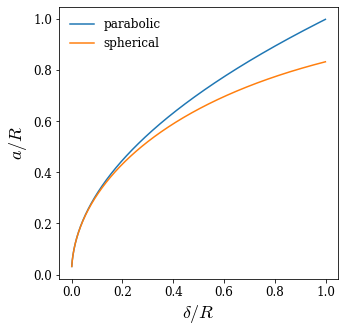

In [8]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(𝛿/R, a_p/R, label='parabolic')
ax.plot(𝛿/R, a_s/R, label='spherical')

ax.set_xlabel(r'$\delta/R$', fontsize=18)
ax.set_ylabel(r'$a/R$', fontsize=18)

ax.legend(frameon=False);

**ratio between $E_\textrm{par}$ and $E_\textrm{sph}$**

Defining ratio $\gamma$ as,

$$
\gamma = \frac{E_\textrm{par}}{E_\textrm{sph}}
$$



$$
\gamma = \frac{3}{4}\frac{R}{a_\textrm{par}^3}\left( \frac{a_\textrm{sph}^2+R^2}{2}\ln\frac{R+a_\textrm{sph}}{R-a_\textrm{sph}} - a_\textrm{sph}R \right)
$$

Note that $(1 - \nu^2)F_N$ cancels out.

In [9]:
γ = 3/4 * R/a_p**3 * ((a_s**2 + R**2) / 2 * np.log((R+a_s)/(R-a_s)) - a_s*R)

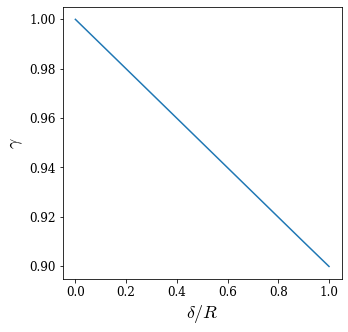

In [10]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(δ/R, γ)
ax.set_xlabel('$\delta/R$', fontsize=18)
ax.set_ylabel('$\gamma$', fontsize=18);

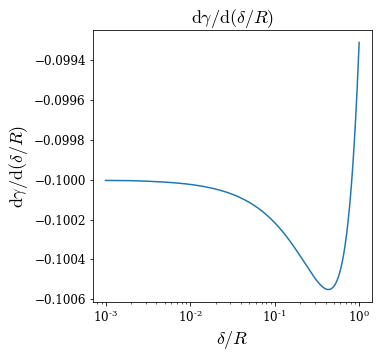

In [11]:
fig, ax = plt.subplots(figsize=(5,5))

ax.semilogx(δ/R, np.gradient(γ, δ/R))
ax.set_xlabel('$\delta/R$', fontsize=18)
ax.set_ylabel('$\mathrm{d}\gamma / \mathrm{d}(\delta/R)$', fontsize=18)
ax.set_title('$\mathrm{d}\gamma / \mathrm{d}(\delta/R)$', fontsize=18);

$\mathrm{d}\gamma / \mathrm{d}(\delta/R)$ converges to $-1/10$ for $\delta/R\to0^+$

Proposing first-oder Taylor expansion as approximation of $\gamma$ around $\delta/R=0$

$$
\gamma = \sum_{n=0}^\infty\frac{\gamma^{(n)}(0)}{n!} \left(\frac{\delta}{R}\right)^n \approx 1 - \frac{1}{10}\frac{\delta}{R}
$$

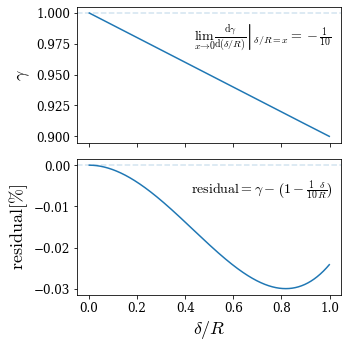

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(5,5), sharex=True)

ax[0].axhline(1, linestyle='--', alpha=.2)
ax[0].plot(δ/R, γ)

ax[0].text(0.72,0.98, r'$\lim_{x\to 0}\left.\frac{\mathrm{d}\gamma}{\mathrm{d}(\delta/R)}\right|_{\delta/R=x}=-\frac{1}{10}$', va='center', ha='center', fontsize=14)

# ax[0].set_xlabel(r'$\delta / R$', fontsize=12)
ax[0].set_ylabel(r'$\gamma$', fontsize=18)

ax[1].axhline(0, linestyle='--', alpha=.2)
ax[1].plot(δ/R, (γ - (1 - 0.1*(𝛿/R)))*100)

ax[1].set_ylabel(r'$\mathrm{residual }[\%]$', fontsize=18)
ax[1].set_xlabel(r'$\delta/R$', fontsize=18);

ax[1].text(0.72, -0.006, r'$\mathrm{residual} = \gamma - \left(1 - \frac{1}{10}\frac{\delta}{R}\right)$', ha='center', va='center', fontsize=14)

fig.tight_layout()

In [13]:
γ_est = 1 - δ/R/10

$$
\gamma \approx 1 - \frac{1}{10}\frac{\delta}{R}
$$

Residual plot indicates $\gamma$ is not linear, however a really good approximation ($\max|\mathrm{residual}|\sim0.03\%$). Using lower $\epsilon$ in Newton-Raphson method or less $\delta$ points leads to the same curve.

Now multiplying the parabolic method with the $\gamma$ approximation leads to

$$
F_N = \frac{4}{3}\frac{E}{1 - \nu^2} \left(1-\frac{1}{10}\frac{\delta}{R}\right)\sqrt{R\delta^3}
$$

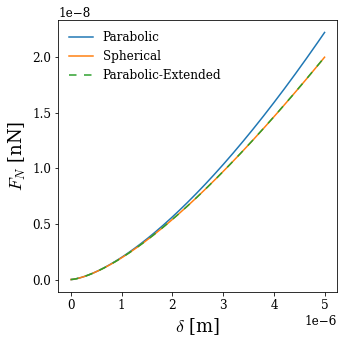

In [14]:
fig, ax = plt.subplots(figsize=(5,5))

E = 500
nu = 0.5

Fp = 4/3 * E / (1 - nu**2) * a_p**3 / R
Fs = E / (1 - nu**2) * ((a_s**2 + R**2) / 2 * np.log((R+a_s)/(R-a_s)) - a_s*R)

Fp_ext = γ_est * Fp

ax.plot(𝛿, Fp, label='Parabolic')
ax.plot(𝛿, Fs, label='Spherical')
ax.plot(𝛿, Fp_ext, linestyle=(0,(5,5)), label='Parabolic-Extended')

ax.set_xlabel(r'$\delta$ [m]', fontsize=18)
ax.set_ylabel(r'$F_N$ [nN]', fontsize=18)

ax.legend(frameon=False);

Figure aboves shows multiplying parabolic model with $\gamma\approx\left(1 - \frac{1}{10}\frac{\delta}{R}\right)$ approximates the analytical spherical model more accurate.

Popov (p. 33) states also to use parabolic $\delta\ll R$ of its good approximation. However, if using the correction factor is correct, experiments may not be limited to the $\delta\ll R$ condition.